Preparacion del entorno


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Especificar directorio y nombre del archivo por separado
dir_path = '/content/drive/MyDrive/Colab Notebooks/Grupo_Upso/Ap.Mq.BigData/TP3/'
#dir_path = '/content/drive/MyDrive/Colab Notebooks/Grupo_Upso/Ap.Mq.BigData/TP3/'
file_name = 'Crimenes.csv'

# Usa os.path.join para construir la ruta completa
ruta = os.path.join(dir_path, file_name)

# Verifica si el archivo existe antes de cargarlo
if os.path.exists(ruta):
    data = pd.read_csv(ruta)
else:
    print("El archivo no existe en la ruta proporcionada.")
data

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


# **1. BUSCAR LAS CARACTERISTICAS MAS RELEVANTES**

Para examinar las correlaciones entre diferentes variables del DataFrame, se va a utilizar la matriz de correlacion de Pearson.

Se puede observar que Las características:

Asaltos y Asesinatos tienen una correlación bastante alta de 0.801873. Esto sugiere una relación fuerte y positiva entre estas dos variables.

Asaltos y Violaciones tienen una correlacion bastante alta de 0.665241. Esto sugiere una relación fuerte y positiva entre estas dos variables.

Asesinatos y Violaciones: Tienen una correlación de 0.563579, lo que indica una correlación moderada.

Población Urbana: Las correlaciones con otras variables son relativamente bajas, indicando que Población Urbana no está fuertemente correlacionada con Asesinatos, Asaltos y Violaciones en este conjunto de datos.

Si dos variables están altamente correlacionadas, puede ser redundante incluirlas ambas, ya que proporcionan información similar. Por este motivo se va a descartar Asalto ya que esta correlacionada con Asesinatos y Violaciones.

Se van a tomar como variables relevantes: Asesinatos y Violaciones.


                  Asesinatos   Asaltos  Poblacion Urbana  Violaciones
Asesinatos          1.000000  0.801873          0.069573     0.563579
Asaltos             0.801873  1.000000          0.258872     0.665241
Poblacion Urbana    0.069573  0.258872          1.000000     0.411341
Violaciones         0.563579  0.665241          0.411341     1.000000


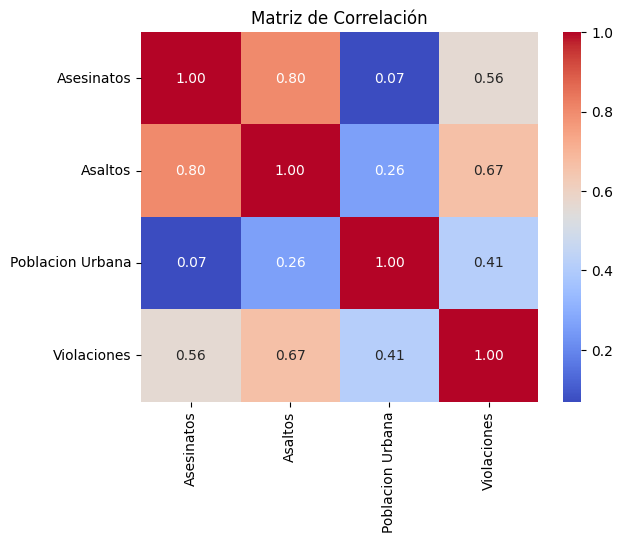

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Supongamos que 'df' es tu DataFrame con las variables relevantes
correlation_matrix = data[['Asesinatos', 'Asaltos', 'Poblacion Urbana', 'Violaciones']].corr()

# Visualizar la matriz de correlación
print(correlation_matrix)
# Crear un mapa de calor de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

# **2. ESCALAR LOS DATOS**

In [ ]:
# Seleccionar características relevantes para el clustering
X = data[[ 'Asesinatos','Violaciones']]

# Escalar los datos para asegurar que todas las características tengan la misma importancia
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.25517927, -0.00345116],
       [ 0.51301858,  2.50942392],
       [ 0.07236067,  1.05346626],
       [ 0.23470832, -0.18679398],
       [ 0.28109336,  2.08881393],
       [ 0.02597562,  1.88390137],
       [-1.04088037, -1.09272319],
       [-0.43787481, -0.58583422],
       [ 1.76541475,  1.1505301 ],
       [ 2.22926518,  0.49265293],
       [-0.57702994, -0.11129987],
       [-1.20322802, -0.75839217],
       [ 0.60578867,  0.29852525],
       [-0.13637203, -0.0250209 ],
       [-1.29599811, -1.07115345],
       [-0.41468229, -0.34856705],
       [ 0.44344101, -0.53190987],
       [ 1.76541475,  0.10439756],
       [-1.31919063, -1.44862395],
       [ 0.81452136,  0.70835037],
       [-0.78576263, -0.53190987],
       [ 1.00006153,  1.49564599],
       [-1.1800355 , -0.68289807],
       [ 1.9277624 , -0.44563089],
       [ 0.28109336,  0.75148985],
       [-0.41468229, -0.521125  ],
       [-0.80895515, -0.51034012],
       [ 1.02325405,  2.671197  ],
       [-1.31919063,

Escalar los datos: Utiliza StandardScaler de scikit-learn para estandarizar las características. Esto implica restar la media y dividir por la desviación estándar para cada característica. El resultado es que las características tienen una media de cero y una desviación estándar de uno.

# **2. NORMALIZAR LOS DATOS**

LA VARIABLE SE DEVERIA LLAMAR NORMALIZED. PERO PARA CORRER EL CODIGO SIGUIENTE LA LLAME IGUAL. HAY QUE ELEGIR UNO DE LOS 2 PROCESOS: SCALAR O NORMALIZAR...


Normalizar las características: Calcula la normalización de las características, que es una forma diferente de estandarizar los datos. La normalización ajusta los valores de las características para que estén en la misma escala (generalmente entre 0 y 1). Aquí, se está utilizando la fórmula estándar de normalización z-score:

In [ ]:
# Seleccionar características relevantes para el clustering
X = data[['Asesinatos', 'Asaltos', 'Violaciones']]

# Normalizar las características
X_scaled = (X - X.mean()) / X.std()
X_scaled= X_scaled.values
X_scaled

array([[ 1.24256408,  0.78283935, -0.00341647],
       [ 0.50786248,  1.10682252,  2.48420294],
       [ 0.07163341,  1.47880321,  1.04287839],
       [ 0.23234938,  0.23086801, -0.1849166 ],
       [ 0.27826823,  1.26281442,  2.06782029],
       [ 0.02571456,  0.39885929,  1.86496721],
       [-1.030419  , -0.72908214, -1.08174077],
       [-0.43347395,  0.8068381 , -0.57994629],
       [ 1.74767144,  1.97077766,  1.13896669],
       [ 2.20685994,  0.48285493,  0.48770152],
       [-0.5712305 , -1.49704226, -0.11018125],
       [-1.19113497, -0.60908837, -0.75076995],
       [ 0.59970018,  0.93883125,  0.29552492],
       [-0.13500142, -0.69308401, -0.02476943],
       [-1.28297267, -1.37704849, -1.06038781],
       [-0.41051452, -0.66908525, -0.34506377],
       [ 0.43898421, -0.74108152, -0.5265639 ],
       [ 1.74767144,  0.93883125,  0.10334831],
       [-1.3059321 , -1.05306531, -1.43406455],
       [ 0.80633501,  1.55079947,  0.70123109],
       [-0.77786532, -0.26110644, -0.526

# **3. ENCONTRAR EL k OPTIMO**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

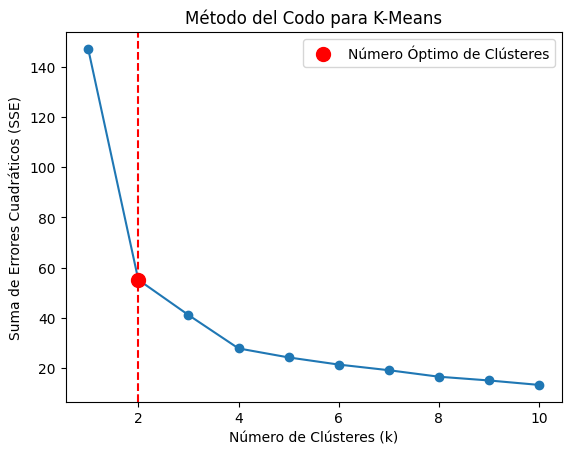

Número óptimo de clústeres: 2


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

def find_optimal_clusters_kmeans(data, max_k):
    sse = []  # Suma de errores cuadraticos
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k).fit(data)
        sse.append(kmeans.inertia_)

    # Encontrar el punto de codo utilizando la derivada segunda
    second_derivative = np.diff(np.diff(sse))
    optimal_clusters_index = np.where(second_derivative == max(second_derivative))[0][0] + 2  # +2 debido a las diferencias en las longitudes de las listas

    # Graficar el método del codo
    plt.plot(range(1, max_k + 1), sse, 'o-', zorder=0)
    plt.scatter(optimal_clusters_index, sse[optimal_clusters_index - 1], c='red', marker='o', s=100, label='Número Óptimo de Clústeres', zorder=2)
    plt.axvline(x=optimal_clusters_index, color='red', linestyle='--', zorder=1)
    plt.xlabel("Número de Clústeres (k)")
    plt.ylabel("Suma de Errores Cuadráticos (SSE)")
    plt.title("Método del Codo para K-Means")
    plt.legend()
    plt.show()

    return optimal_clusters_index

# Ejemplo:
optimal_clusters = find_optimal_clusters_kmeans(X_scaled, 10)
print(f"Número óptimo de clústeres: {optimal_clusters}")


# **4. APLICAR METODO K-MEANS**

La elección del número de columnas o características en el conjunto de datos puede tener un impacto significativo en la efectividad y la interpretación del algoritmo K-Means. Aquí hay algunas consideraciones:

Número de Dimensiones: La elección de dos columnas crea un espacio bidimensional. Esto facilita la visualización en un gráfico de dispersión, lo que puede ser útil para comprender la distribución de los datos y la formación de clústeres.

Interpretación Visual: Un espacio bidimensional permite visualizar claramente los grupos formados por K-Means en un gráfico de dispersión. Puedes identificar visualmente los clústeres y cómo se distribuyen en el espacio.

Limitaciones de Visualización: En conjuntos de datos con más características, la visualización se vuelve más desafiante, ya que no puedes representar todos los atributos simultáneamente en un gráfico de dispersión. Esto puede hacer que sea difícil entender completamente la estructura de los clústeres en espacios de mayor dimensión.

Más Dimensiones: Al considerar más columnas, estás trabajando en espacios de características de mayor dimensión. K-Means intentará agrupar los datos en función de la proximidad en este espacio multidimensional. Esto puede ser más potente para capturar patrones complejos, pero también puede ser más difícil de visualizar y entender.

Es importante encontrar un equilibrio entre la simplicidad para interpretar y la capacidad de capturar la complejidad del conjunto de datos. Por es te motivo la elección de las columnas: "Asesinatos" y "Violaciones", brindan el mismo resultado al usar K-Means con cuatro columnas pero ofrece la simplicidad al visualizar los datos.

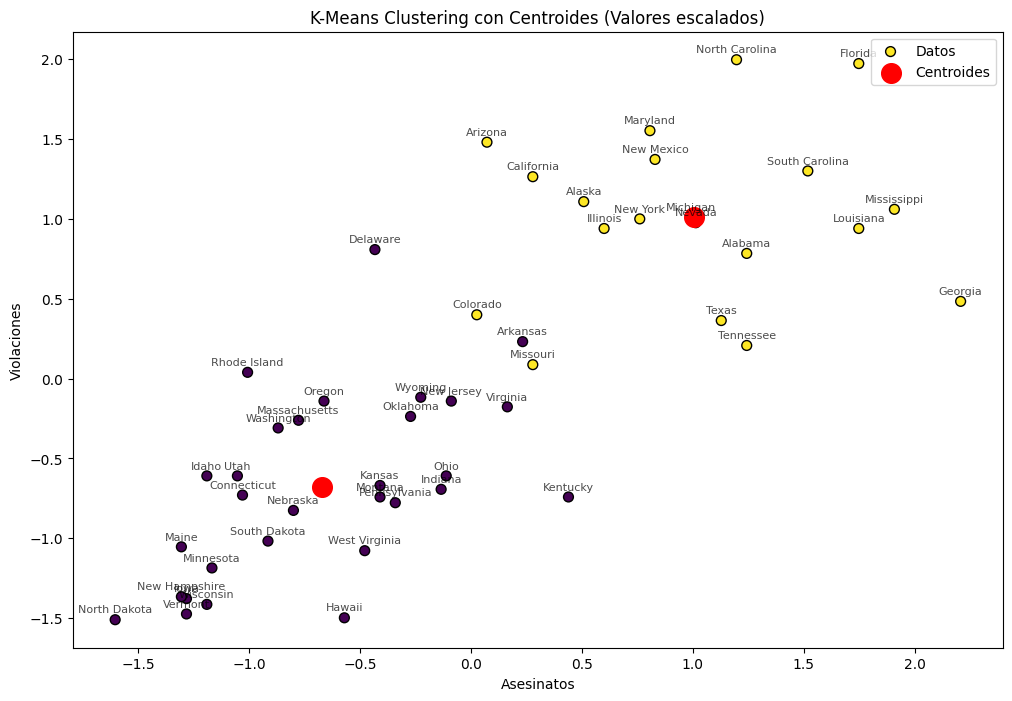

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Entrenamiento del modelo de K-Means con el número óptimo de clústeres(2)
kmeans_optimal = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters_optimal = kmeans_optimal.fit_predict(X_scaled)

# Visualizar el gráfico de dispersión con los centroides y estados
plt.figure(figsize=(12, 8))

# Scatter plot de dos características, coloreando por clúster
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters_optimal, cmap='viridis', s=50, edgecolors='k')

# Scatter plot de centroides utilizando los centroides del modelo KMeans
centroides = plt.scatter(kmeans_optimal.cluster_centers_[:, 0], kmeans_optimal.cluster_centers_[:, 1], c='red', marker='o', s=200, label='Centroides')

# Agregar anotaciones para los nombres de los estados
for i, estado in enumerate(data['Estado']):
    plt.annotate(estado, (X_scaled[i, 0], X_scaled[i, 1]), textcoords="offset points", xytext=(0,5), ha='center', fontsize=8, color='black', alpha=0.7)

# Etiquetas y leyenda
plt.title('K-Means Clustering con Centroides (Valores escalados)')
plt.xlabel('Asesinatos')
plt.ylabel('Violaciones')

# Leyenda que combina la leyenda de scatter y centroides
plt.legend([scatter, centroides], ['Datos', 'Centroides'])

plt.show()


ValueError: ignored

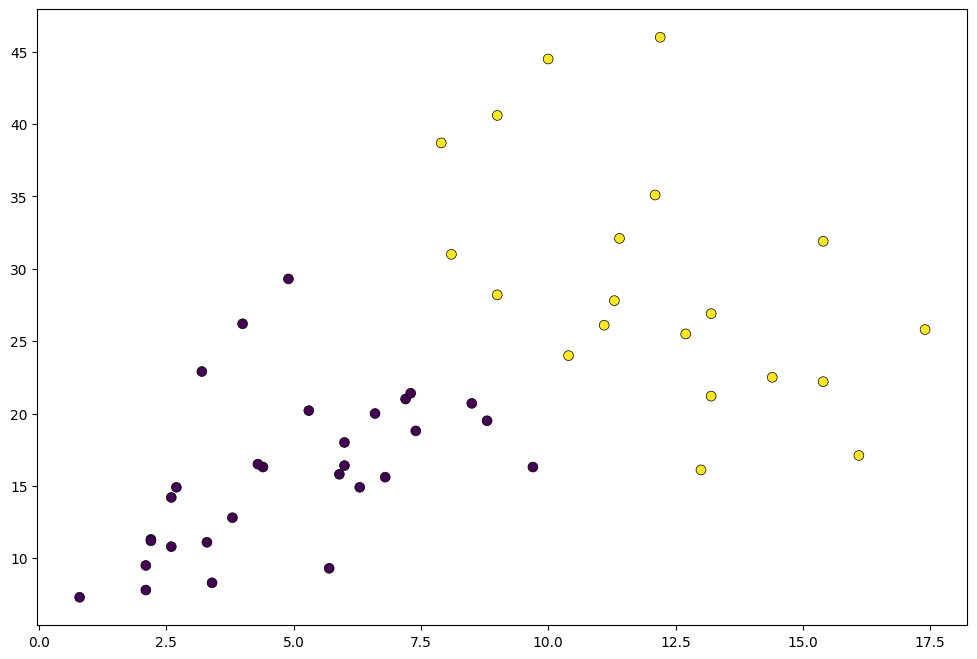

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Graficar los resultados con los centroides
plt.figure(figsize=(12, 8))

# Se grafican los datos
plt.scatter(data['Asesinatos'], data['Violaciones'], c=clusters_optimal, cmap='viridis', s=50, edgecolors='k', linewidth=0.5)

# Coordenadas de los Centroides
centroids = kmeans_optimal.cluster_centers_
# Coordenadas de los centroides en la escala original
centroids_original_scale = scaler.inverse_transform(kmeans_optimal.cluster_centers_)

# Se grafican los centroides
plt.scatter(centroids_original_scale[:, 0], centroids_original_scale[:, 1], s=200, c='red', marker='o', label="Centroides")

# Agregar anotaciones para los nombres de los estados
for i, estado in enumerate(data['Estado']):
    # Convertir las coordenadas normalizadas a la escala original
    x_original = X_scaled[i, 0] * X.std()['Asesinatos'] + X.mean()['Asesinatos']
    y_original = X_scaled[i, 1] * X.std()['Violaciones'] + X.mean()['Violaciones']

    plt.annotate(estado, (x_original, y_original), textcoords="offset points", xytext=(0,5), ha='center', fontsize=8, color='black', alpha=0.7)
plt.title('K-Means Clustering con Centroides (Valores originales)')
plt.xlabel('Asesinatos')
plt.ylabel('Asaltos')
plt.legend()
plt.grid(True)
plt.show()


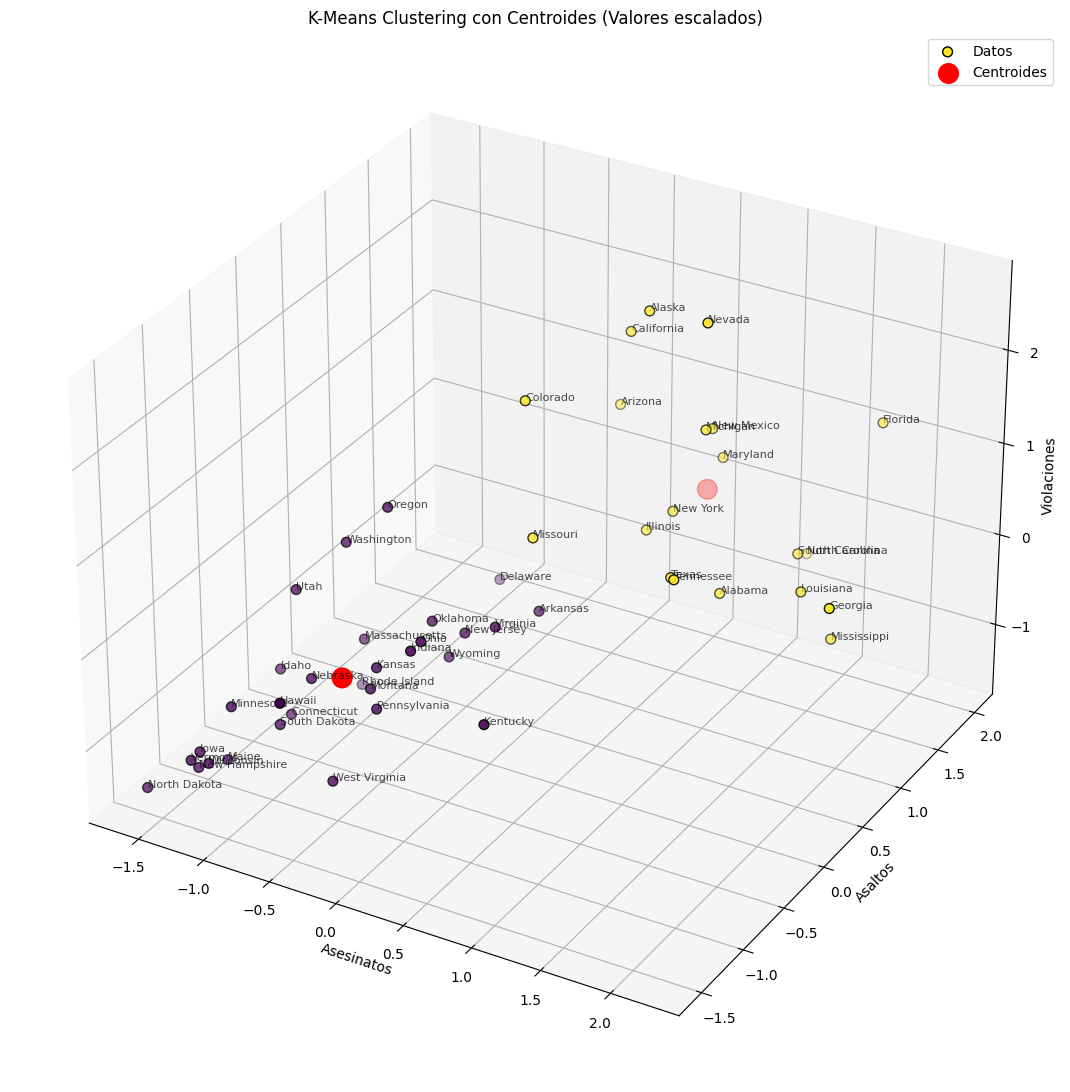

In [ ]:
# NO IRIA ES 3D
from mpl_toolkits.mplot3d import Axes3D

# Entrenamiento del modelo de K-Means con el número óptimo de clústeres (2)
kmeans_optimal = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters_optimal = kmeans_optimal.fit_predict(X_scaled)

# Visualizar el gráfico de dispersión en 3D con los centroides y estados
fig = plt.figure(figsize=(35, 20))
ax = fig.add_subplot(111, projection='3d')

# Ajusta el margen alrededor del subplot
fig.subplots_adjust(left=0.1, right=0.4, bottom=0.1, top=0.9)

# Scatter plot de tres características, coloreando por clúster
scatter = ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=clusters_optimal, cmap='viridis', s=50, edgecolors='k')

# Scatter plot de centroides utilizando los centroides del modelo KMeans
centroides = ax.scatter(kmeans_optimal.cluster_centers_[:, 0], kmeans_optimal.cluster_centers_[:, 1], kmeans_optimal.cluster_centers_[:, 2], c='red', marker='o', s=200, label='Centroides')

# Agregar anotaciones para los nombres de los estados
for i, estado in enumerate(data['Estado']):
    ax.text(X_scaled[i, 0], X_scaled[i, 1], X_scaled[i, 2], estado, fontsize=8, color='black', alpha=0.7)

# Etiquetas y leyenda
ax.set_title('K-Means Clustering con Centroides (Valores escalados)')
ax.set_xlabel('Asesinatos')
ax.set_ylabel('Asaltos')
ax.set_zlabel('Violaciones')

# Leyenda que combina la leyenda de scatter y centroides
ax.legend([scatter, centroides], ['Datos', 'Centroides'])
ax.xaxis.labelpad = 1  # Ajustar la posición de la etiqueta del eje x
ax.yaxis.labelpad = 1  # Ajustar la posición de la etiqueta del eje y
ax.zaxis.labelpad = 0.1  # Ajustar la posición de la etiqueta del eje z

plt.show()


SE OBTIENE COLUMNA CLUSTER

In [ ]:
# La agrega la columna 'Cluster' en el dataframe con los valores obtenidos de K-Means de las etiquetas de clúster asignadas a cada muestra en el conjunto de datos
data['Cluster'] = clusters_optimal
data

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones,Cluster
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,1


PROMEDIOS DE CADA CARACTERISTICA POR CLUSTER

In [ ]:
# Estadísticas resumidas por clúster
cluster_stats = data.groupby('Cluster').mean()

# Visualizar las estadísticas resumidas
print(cluster_stats)

         Asesinatos     Asaltos  Poblacion Urbana  Violaciones
Cluster                                                       
0             4.870  114.433333         63.633333    15.943333
1            12.165  255.250000         68.400000    29.165000


<ipython-input-12-f57d879dd174>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_stats = data.groupby('Cluster').mean()


SE VA A TRATAR DE DEFINIR LA ETIQUETA DE CADA CLUSTER

Se va utlizar la matriz de correlacion de Pearson para ver que caracteristica es mas relevante para poder definir la etiqueta del cluster.O sea si 1 es peligrosidad alta o baja.

Asalto es la caracteristica que tienen mas correlacion con cluster, y se va a utilizar para definir la etiqueta.

<ipython-input-13-9a42b004d603>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


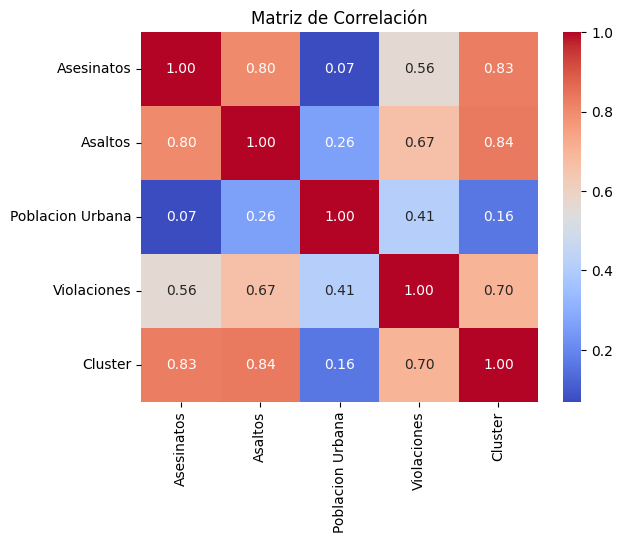

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Supongamos que 'df' es tu DataFrame con las variables relevantes
correlation_matrix = data.corr()

# Crear un mapa de calor de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

SE DEFINE ETIQUETA PARA VALOR DE CLUSTER

In [ ]:
# Calcular la media de la tasa de asesinatos para cada clúster
cluster_means = data.groupby('Cluster')['Asaltos'].mean()
cluster_means

Cluster
0    114.433333
1    255.250000
Name: Asaltos, dtype: float64

In [ ]:
# Determinar el clúster más peligroso
cluster_mas_peligroso = cluster_means.idxmax()
print("Peligrosidad Alta: Cluster ",cluster_mas_peligroso )

Peligrosidad Alta: Cluster  1


SE CREA NUEVA COLUMNA PELIGROSIDAD

In [ ]:
# Asignar Peligrosidad 'Baja' al clúster menos peligroso y 'Alta' al clúster más peligroso
# Se asigna peligrosidad 'Baja' a toda la columna peligrosidad
data['Peligrosidad'] = 'Baja'
# Se cambia a 'Alta' a las filas que contengan '1' en la columna 'Cluster'
data.loc[data['Cluster'] == cluster_mas_peligroso, 'Peligrosidad'] = 'Alta'
data

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones,Cluster,Peligrosidad
0,Alabama,13.2,236,58,21.2,1,Alta
1,Alaska,10.0,263,48,44.5,1,Alta
2,Arizona,8.1,294,80,31.0,1,Alta
3,Arkansas,8.8,190,50,19.5,0,Baja
4,California,9.0,276,91,40.6,1,Alta
5,Colorado,7.9,204,78,38.7,1,Alta
6,Connecticut,3.3,110,77,11.1,0,Baja
7,Delaware,5.9,238,72,15.8,0,Baja
8,Florida,15.4,335,80,31.9,1,Alta
9,Georgia,17.4,211,60,25.8,1,Alta


GRAFICO BOXPLOT

El boxplot es útil para identificar la dispersión y simetría de los datos, así como para detectar valores atípicos. También facilita la comparación visual de la distribución entre diferentes grupos o categorías. En el contexto del clustering, los boxplots se usa para visualizar cómo las variables difieren entre los clústeres. Partes:

Caja (Box): La caja representa el rango intercuartílico (IQR), que es la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1). La parte inferior de la caja está en Q1, y la parte superior está en Q3. La altura de la caja indica la dispersión del 50% central de los datos.

Línea Central en la Caja (Mediana): Una línea en el medio de la caja representa la mediana, que es el valor que divide el conjunto de datos en dos mitades iguales. Es el segundo cuartil (Q2).

Bigotes (Whiskers): Los bigotes se extienden desde los extremos de la caja hasta los valores extremos que caen dentro de 1.5 veces el IQR desde Q1 o Q3. Los bigotes muestran la extensión de los datos, excluyendo los valores atípicos.

Puntos Fuera de los Bigotes (Outliers): Los puntos más allá de los bigotes se consideran valores atípicos y se representan como puntos individuales. Estos son valores que están significativamente más lejos de la mayoría de los datos.

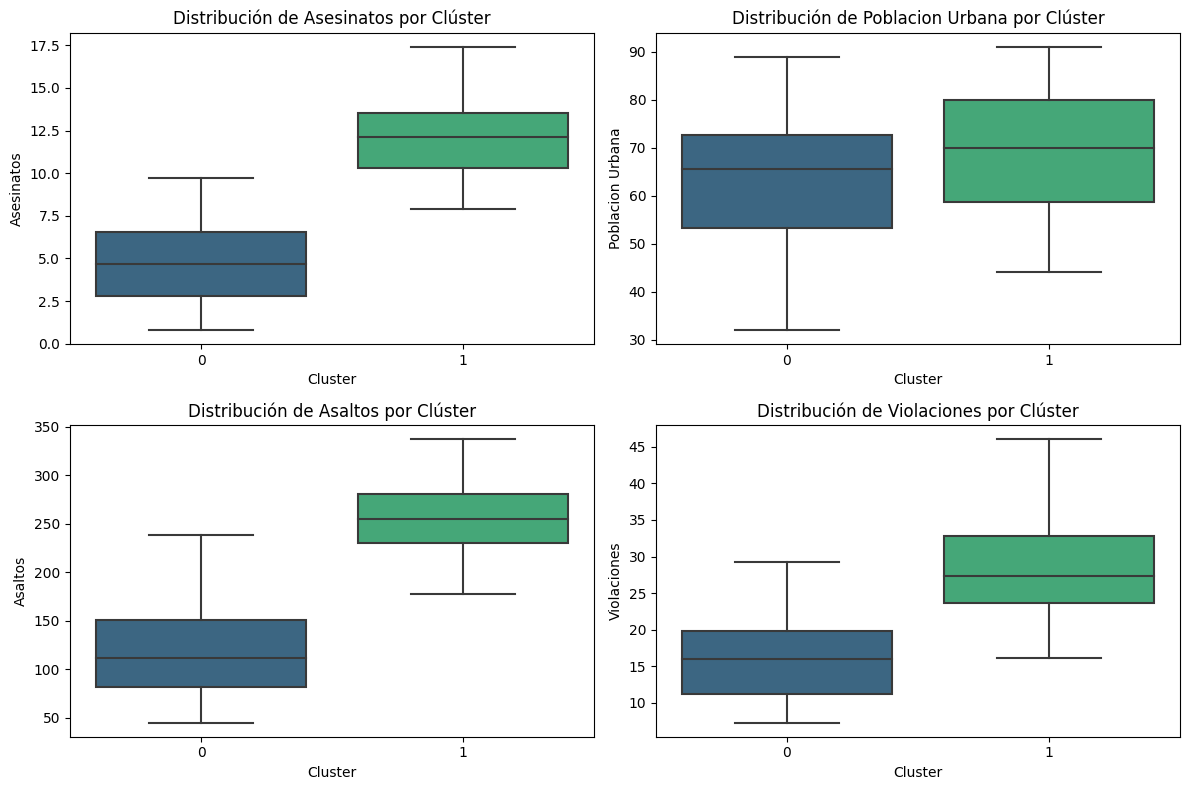

In [ ]:
import seaborn as sns

# Establecer el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Crear un gráfico de cajas para cada característica
for i, feature in enumerate(['Asesinatos', 'Poblacion Urbana', 'Asaltos', 'Violaciones']):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='Cluster', y=feature, data=data, palette='viridis')
    plt.title(f'Distribución de {feature} por Clúster')

# Ajustar el diseño
plt.tight_layout()
plt.show()

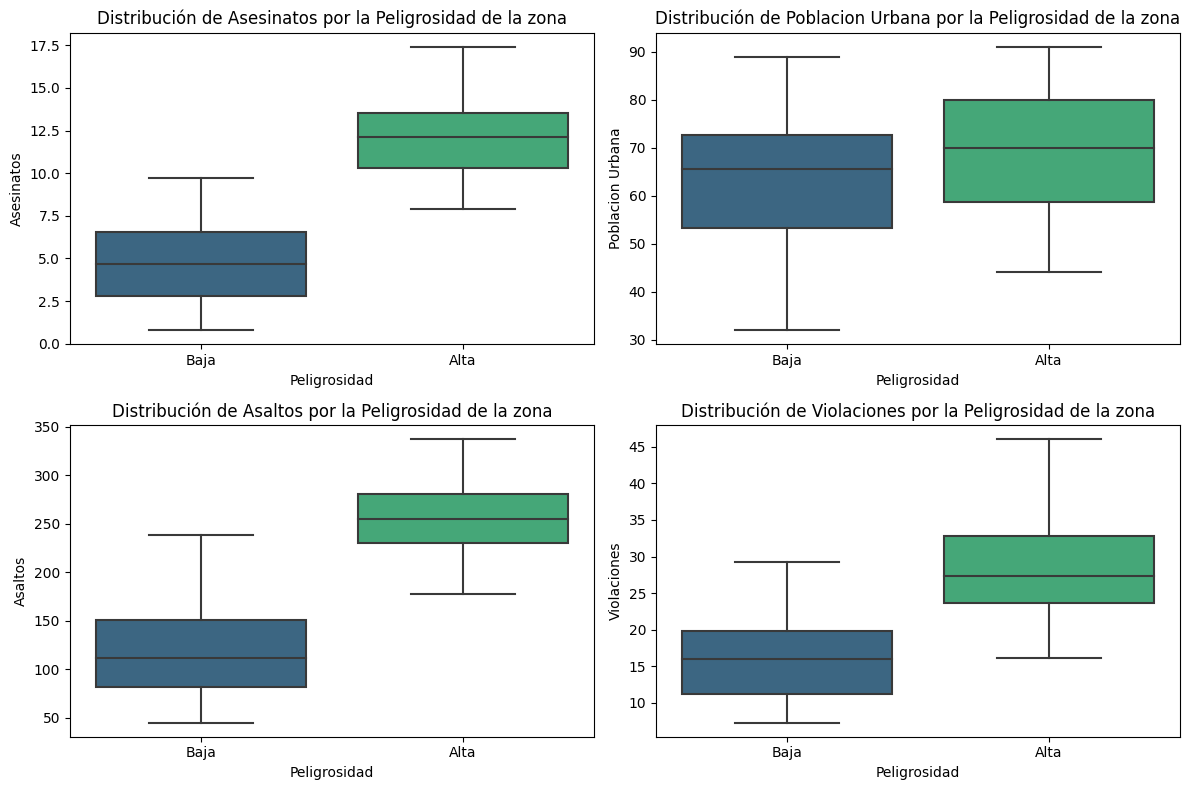

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

# Establecer el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Crear un gráfico de cajas para cada característica
for i, feature in enumerate(['Asesinatos', 'Poblacion Urbana', 'Asaltos', 'Violaciones']):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='Cluster', y=feature, data=data, palette='viridis')
    plt.title(f'Distribución de {feature} por la Peligrosidad de la zona')

    # Personalizar etiquetas en el eje x
    plt.xticks(ticks=[0, 1], labels=['Baja', 'Alta'])
    plt.xlabel('Peligrosidad')
# Ajustar el diseño
plt.tight_layout()
plt.show()

GRAFICO DE MATRIZ DE DISPERSION POR CLUSTER

El gráfico generado con sns.pairplot es conocido como "pair plot" o "scatterplot matrix". Es una matriz de gráficos de dispersión que muestra relaciones bivariadas entre variables. Cada celda de la matriz muestra un gráfico de dispersión de dos variables, y en la diagonal principal, generalmente se representan histogramas o gráficos de densidad para cada variable

<Figure size 1200x800 with 0 Axes>

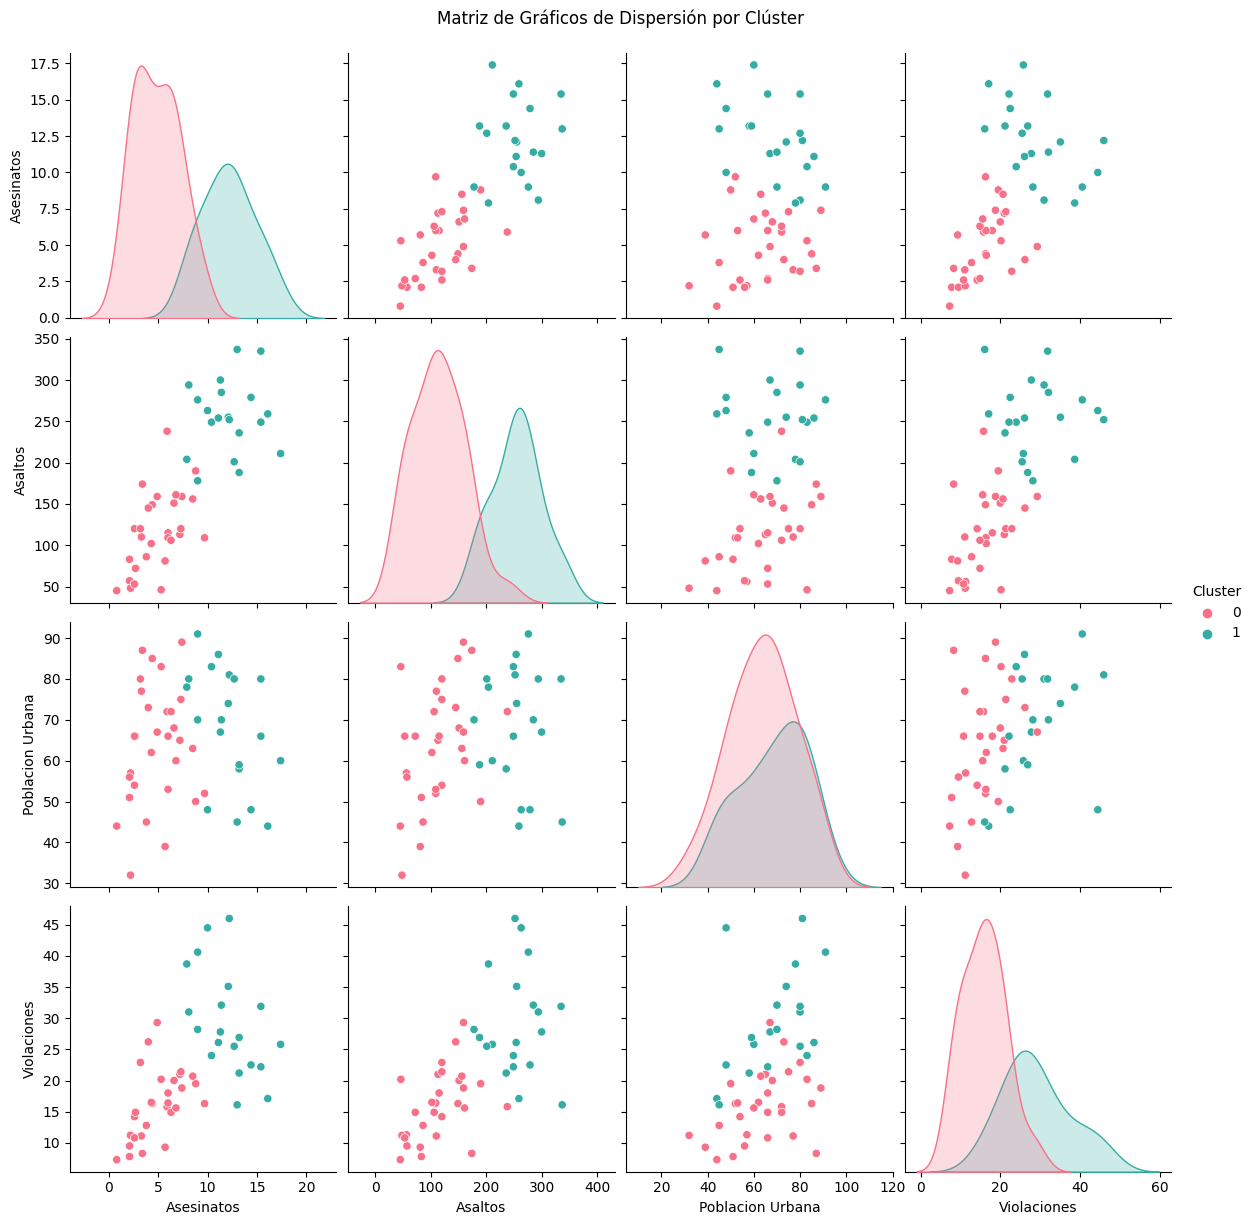

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Establecer el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Crear el pairplot con Seaborn
sns.pairplot(data, hue="Cluster", palette="husl", height=3)

# Agregar título al pairplot
plt.suptitle("Matriz de Gráficos de Dispersión por Clúster", y=1.02)

# Mostrar el gráfico
plt.show()


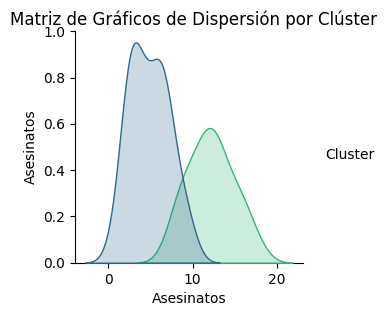

In [ ]:
# Seleccionar las variable para la matriz de gráficos de dispersión
variables = ['Asesinatos']

# Visualizar la matriz de gráficos de dispersión coloreada por clúster
sns.pairplot(data, vars=variables, hue='Cluster', palette='viridis', height=3)
plt.suptitle('Matriz de Gráficos de Dispersión por Clúster', y=1.02)
plt.show()


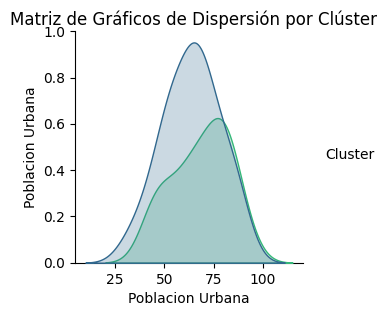

In [ ]:
# Seleccionar las variable para la matriz de gráficos de dispersión
variables = ['Poblacion Urbana']

# Visualizar la matriz de gráficos de dispersión coloreada por clúster
sns.pairplot(data, vars=variables, hue='Cluster', palette='viridis', height=3)
plt.suptitle('Matriz de Gráficos de Dispersión por Clúster', y=1.02)
plt.show()

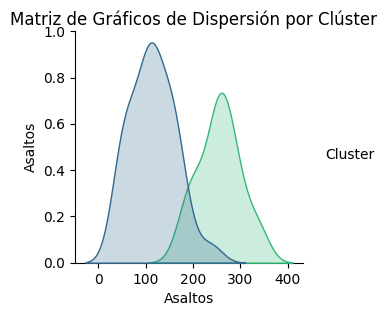

In [ ]:
# Seleccionar las variable para la matriz de gráficos de dispersión
variables = ['Asaltos']

# Visualizar la matriz de gráficos de dispersión coloreada por clúster
sns.pairplot(data, vars=variables, hue='Cluster', palette='viridis', height=3)
plt.suptitle('Matriz de Gráficos de Dispersión por Clúster', y=1.02)
plt.show()

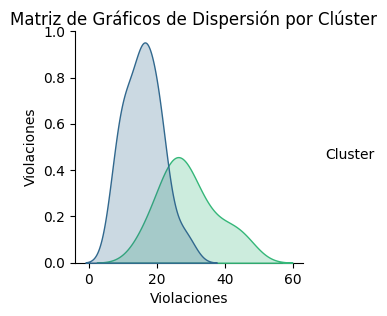

In [ ]:
# Seleccionar las variable para la matriz de gráficos de dispersión
variables = ['Violaciones']

# Visualizar la matriz de gráficos de dispersión coloreada por clúster
sns.pairplot(data, vars=variables, hue='Cluster', palette='viridis', height=3)
plt.suptitle('Matriz de Gráficos de Dispersión por Clúster', y=1.02)
plt.show()